In [358]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

##### Apertura e lettura del file

In [359]:
# Apertura e lettura del file
#file = open("data.txt","r")
#data = file.read()

df = pd.read_table('data.txt', sep=',', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,1,6,5,3,2,2,7,4,10,3,9,3,8,2,8,12
1,4,7,6,5,12,4,3,7,13,11,11,10,10,9,9,8,13,13
2,3,2,1,6,4,9,2,5,7,6,4,1,2,3,2,6,3,3


##### Divisione dei dati letti in input e creazione delle liste contenenti i nodi e i pesi relativi

La prima riga rappresenta il nodo di partenza di ogni arco, la seconda il node di arrivo e la terza il peso di ogni arco

In [360]:
# Divisione del file nelle tre righe di dati
#lista = data.split("\n")

# parsing in lista di interi
#da = [int(i) for i in lista[0].split(', ')]
#a = [int(i) for i in lista[1].split(', ')]
#pesi = [int(i) for i in lista[2].split(', ')]


da = df[0:1]
a = df[1:2]
pesi = df[2:3]


##### Generazione del grafo

In [361]:
#g = nx.Graph()

#for i in range(len(da)):
#     g.add_edge(da[i],a[i], weight=pesi[i])
    
#nx.draw_planar(g, with_labels = True)
#plt.savefig("prova.png")

In [362]:
# Creation of the graph
G = nx.Graph()

# Extract the nodes from the lists of edges and sort them
nodes = pd.unique(pd.concat([df.loc[0],df.loc[1]]))
nodes.sort()

for i in nodes:
    G.add_node(i)
    
for i in range(da.size):
    G.add_edge(df.iat[0,i], df.iat[1,i], weight=df.iat[2,i])

{(1, 4): Text(-0.3379531856873663, 0.0840803823346465, '3'),
 (1, 7): Text(-0.030801572932062385, -0.15419667887865102, '2'),
 (1, 6): Text(-0.20612604591408226, -0.5266889891339265, '1'),
 (2, 3): Text(0.017751697123732882, 0.3060414559209794, '2'),
 (2, 7): Text(0.21031286953221784, 0.008867212649324899, '5'),
 (2, 8): Text(0.31826234673676396, 0.17808676688605252, '6'),
 (3, 4): Text(-0.29011798977593856, 0.3909692747590544, '9'),
 (3, 10): Text(-0.24804982324262925, 0.6439132349979231, '1'),
 (3, 9): Text(-0.04155766476302685, 0.545413030851849, '3'),
 (4, 11): Text(-0.47523414424223076, 0.4775667971640012, '6'),
 (5, 6): Text(-0.013781300461362257, -0.9447333251182243, '6'),
 (5, 12): Text(0.24551266723012352, -0.8804152106821715, '4'),
 (7, 13): Text(0.31942888948052117, -0.21294240167502226, '7'),
 (8, 9): Text(0.25895298485000423, 0.417458341816922, '2'),
 (8, 13): Text(0.4273783666850673, -0.04372284743829466, '3'),
 (9, 10): Text(-0.1140799385765365, 0.7394598090323605, '2'),

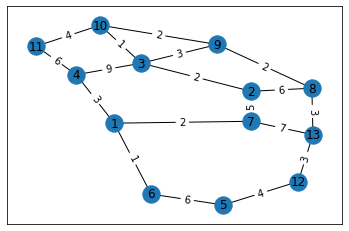

In [363]:
#nx.draw_planar(G, with_labels=True)
pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

Generazione della matrice delle distanze

In [364]:
#mDist = dict(nx.all_pairs_shortest_path_length(G ))
dictDist= dict(nx.all_pairs_dijkstra_path_length(G))

In [365]:
mDist = pd.DataFrame(dictDist)
mDistSorted = mDist.sort_index()
mDistSorted

,1,2,3,4,5,6,7,8,9,10,11,12,13
1,0,7,9,3,7,1,2,12,12,10,9,11,9
2,7,0,2,10,14,8,5,6,5,3,7,12,9
3,9,2,0,9,15,10,7,5,3,1,5,11,8
4,3,10,9,0,10,4,5,14,12,10,6,14,12
5,7,14,15,10,0,6,9,10,12,14,16,4,7
6,1,8,10,4,6,0,3,13,13,11,10,10,10
7,2,5,7,5,9,3,0,10,10,8,11,10,7
8,12,6,5,14,10,13,10,0,2,4,8,6,3
9,12,5,3,12,12,13,10,2,0,2,6,8,5
10,10,3,1,10,14,11,8,4,2,0,4,10,7


Creazione della stringa che sarà il file di input per il programma Minizinc e stampa su file

In [366]:
stringa = "mDist = [";

for i in range(len(mDistSorted)):
    stringa = stringa + "| "
    for j in range(len(mDistSorted)):
        stringa = stringa + str(mDistSorted.iat[i, j]) 
        if j != len(mDistSorted)-1:
            stringa = stringa + ", "
        else:
            stringa = stringa +  os.linesep # aggiunta di \n a fine della riga 
        
stringa = stringa + "|];"

In [367]:
file = open('myfile.dzn', 'w')
file.write(stringa)
file.close()

Creazione di un grafo random

8

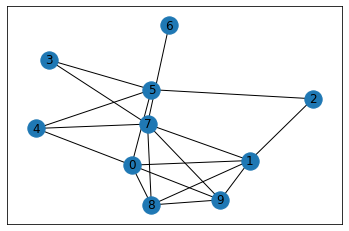

In [369]:
RandG = nx.gnm_random_graph(10,18,seed=1234)
posG=nx.spring_layout(RandG)
nx.draw_networkx(RandG,posG)

#for i in RandG.edges:
#    G.add_edges_from(i, weight=np.random())
np.random.randint(low=1,high=15)
